In [1]:
'''
분류용 sklearn dataset 정리
'''
from sklearn import datasets # dataset 제공 library
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

######################################
# 분류분석에 적합한 데이터셋
######################################

# 1. wine 
'''
와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터

•타겟 변수
◦와인의 종류 : 0, 1, 2 세가지 값 

•특징 변수 
◦알콜(Alcohol)
◦말산(Malic acid)
◦회분(Ash)
◦회분의 알칼리도(Alcalinity of ash) 
◦마그네슘(Magnesium)
◦총 폴리페놀(Total phenols)
◦플라보노이드 폴리페놀(Flavanoids)
◦비 플라보노이드 폴리페놀(Nonflavanoid phenols)
◦프로안토시아닌(Proanthocyanins)
◦색상의 강도(Color intensity)
◦색상(Hue)
◦희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
◦프롤린(Proline)
'''
from sklearn.datasets import load_wine
wine = load_wine()
print(list(wine.target_names)) # ['class_0', 'class_1', 'class_2']


['class_0', 'class_1', 'class_2']


In [2]:
wine_x, wine_y = load_wine(return_X_y=True)
print(type(wine_x)) # <class 'numpy.ndarray'>
print(np.shape(wine_x)) # (178, 13) : matrix
print(np.shape(wine_y)) # (178,) : vector

<class 'numpy.ndarray'>
(178, 13)
(178,)


In [3]:
# numpy -> DataFrame 
wine_df = pd.DataFrame(wine_x, columns=wine.feature_names)
tg = pd.Series(wine_y, dtype="category")
tg = tg.cat.rename_categories(wine.target_names)
wine_df['class'] = tg
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


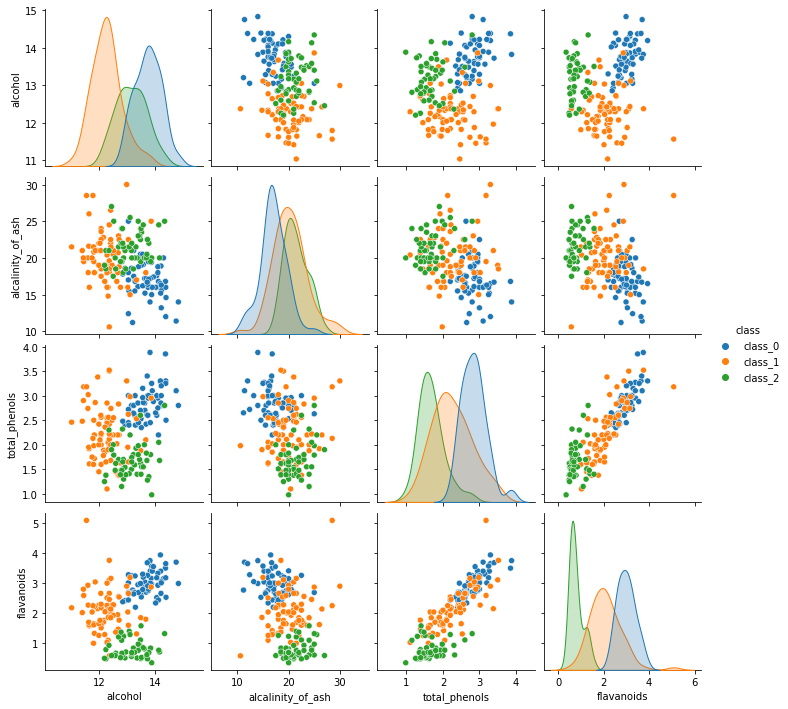

In [4]:
# class별 주요변수 간 산점도 
sn.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="class", data=wine_df)
plt.show()

In [6]:
# 2. breast cancer 데이터셋
'''
유방암(breast cancer) 진단 데이터 

•타겟 변수 
 - 종양이 양성(benign)인지 악성(malignant)인지를 판별
•특징 변수(30개) 
 - 유방암 진단 사진으로부터 측정한 종양(tumar)의 특징값
'''
cancer = datasets.load_breast_cancer()
#print(cancer)
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
cancer_x = cancer.data
cancer_y = cancer.target
print(np.shape(cancer_x)) # (569, 30) : matrix
print(np.shape(cancer_y)) # (569,) : vector

(569, 30)
(569,)


In [8]:
cencar_df = pd.DataFrame(cancer_x, columns=cancer.feature_names)
tg = pd.Series(cancer_y, dtype="category")
tg = tg.cat.rename_categories(cancer.target_names)
cencar_df['class'] = tg
cencar_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,benign


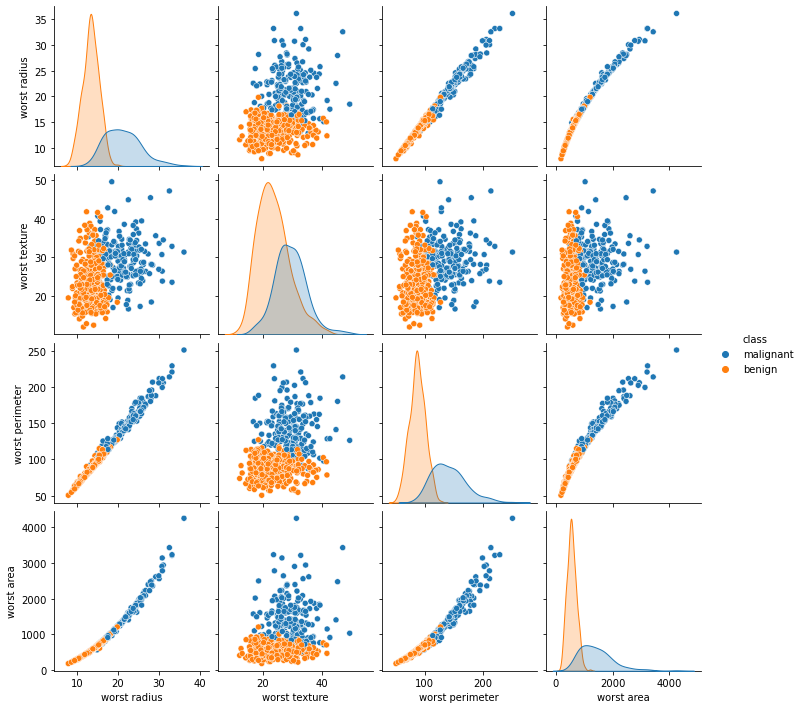

In [9]:
# 타겟 변수 기준 주요변수 간 산점도 
sn.pairplot(vars=["worst radius", "worst texture", "worst perimeter", "worst area"], 
             hue="class", data=cencar_df)
plt.show()

In [10]:
# 3. digits 데이터셋 - 숫자 예측(0~9)
'''
숫자 필기 이미지 데이터

•타겟 변수 
 - 0 ~ 9 : 10진수 정수 
•특징 변수(30개) 
 -0부터 9까지의 숫자를 손으로 쓴 이미지 데이터
 -각 이미지는 0부터 15까지의 16개 명암을 가지는 8x8=64픽셀 해상도의 흑백 이미지
'''
digits = datasets.load_digits()
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [12]:
print(digits.data.shape)
print(digits.target.shape)
#print(digits) # 8x8 image of integer pixels in the range 0..16

(1797, 64)
(1797,)


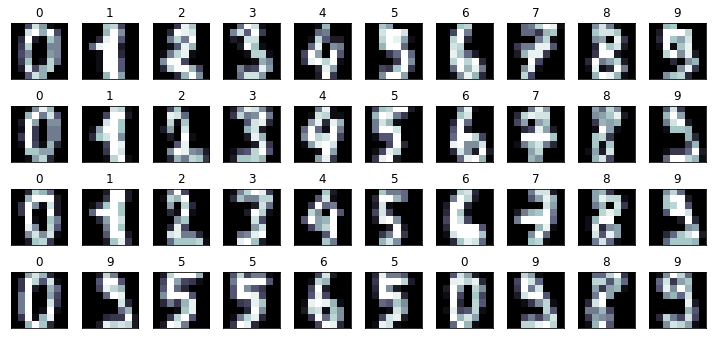

In [13]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N): # 4
    for j in range(M): # 10
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

In [2]:
# 4. Covertype
'''
대표 수종 데이터

•타겟 변수 
 - 미국 삼림을 30×30m 영역으로 나누어 각 영역의 특징으로부터 대표적인 나무의 종(species)을 기록한 데이터
•특징 변수(30개) 
 - 특징 데이터가 54종류, 표본 데이터의 갯수가 581,012개

'''
from sklearn.datasets import fetch_covtype
import pandas as pd

covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30횞30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [3]:
covtype_x = covtype.data 
covtype_y = covtype.target 

print(covtype_x.shape) #  (581012, 54)
print(covtype_y.shape) # (581012,)
print(covtype_x[0]) # 1row 

(581012, 54)
(581012,)
[2.596e+03 5.100e+01 3.000e+00 2.580e+02 0.000e+00 5.100e+02 2.210e+02
 2.320e+02 1.480e+02 6.279e+03 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]


In [4]:
# DataFrame의 특징 변수 지정 
covtype.data.shape[1] # 54
columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])]
columns

['x01',
 'x02',
 'x03',
 'x04',
 'x05',
 'x06',
 'x07',
 'x08',
 'x09',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'x31',
 'x32',
 'x33',
 'x34',
 'x35',
 'x36',
 'x37',
 'x38',
 'x39',
 'x40',
 'x41',
 'x42',
 'x43',
 'x44',
 'x45',
 'x46',
 'x47',
 'x48',
 'x49',
 'x50',
 'x51',
 'x52',
 'x53',
 'x54']

In [5]:
# X변수 칼럼명 지정 : x01 ~ x54
df = pd.DataFrame(covtype.data, 
                  columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])],
                  dtype=float) 
df.head()

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Y변수 DataFrame에 추가 
cy = pd.Series(covtype.target, dtype="category")
df['Cover_Type'] = cy
df.head()

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   x01         581012 non-null  float64 
 1   x02         581012 non-null  float64 
 2   x03         581012 non-null  float64 
 3   x04         581012 non-null  float64 
 4   x05         581012 non-null  float64 
 5   x06         581012 non-null  float64 
 6   x07         581012 non-null  float64 
 7   x08         581012 non-null  float64 
 8   x09         581012 non-null  float64 
 9   x10         581012 non-null  float64 
 10  x11         581012 non-null  float64 
 11  x12         581012 non-null  float64 
 12  x13         581012 non-null  float64 
 13  x14         581012 non-null  float64 
 14  x15         581012 non-null  float64 
 15  x16         581012 non-null  float64 
 16  x17         581012 non-null  float64 
 17  x18         581012 non-null  float64 
 18  x19         581012 non-n

In [8]:
# raw data file save
df.to_csv('C:/Users/hyebin/Desktop/study/python_ML/data/covtype.csv', 
                    index=None, na_rep='NaN', encoding='utf-8')

In [9]:
df = pd.read_csv('C:/Users/hyebin/Desktop/study/python_ML/data/covtype.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x01         581012 non-null  float64
 1   x02         581012 non-null  float64
 2   x03         581012 non-null  float64
 3   x04         581012 non-null  float64
 4   x05         581012 non-null  float64
 5   x06         581012 non-null  float64
 6   x07         581012 non-null  float64
 7   x08         581012 non-null  float64
 8   x09         581012 non-null  float64
 9   x10         581012 non-null  float64
 10  x11         581012 non-null  float64
 11  x12         581012 non-null  float64
 12  x13         581012 non-null  float64
 13  x14         581012 non-null  float64
 14  x15         581012 non-null  float64
 15  x16         581012 non-null  float64
 16  x17         581012 non-null  float64
 17  x18         581012 non-null  float64
 18  x19         581012 non-null  float64
 19  x2

In [11]:
# 특징 변수(1~10) + 타겟 변수 file save
col_names = list(df.columns)
cols = col_names[:10]
cols.append(col_names[-1])

In [12]:
# 타겟변수 : 1~3
covtype_df = df[cols]
covtype_df = covtype_df[covtype_df['Cover_Type']<= 3]
covtype_df.info()
covtype_df.to_csv('C:/Users/hyebin/Desktop/study/python_ML/data/covtype1to10_1to3.csv', 
                    index=None, na_rep='NaN', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530895 entries, 2 to 581011
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x01         530895 non-null  float64
 1   x02         530895 non-null  float64
 2   x03         530895 non-null  float64
 3   x04         530895 non-null  float64
 4   x05         530895 non-null  float64
 5   x06         530895 non-null  float64
 6   x07         530895 non-null  float64
 7   x08         530895 non-null  float64
 8   x09         530895 non-null  float64
 9   x10         530895 non-null  float64
 10  Cover_Type  530895 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 48.6 MB


In [15]:
'''
각 특징 데이터가 가지는 값의 종류를 보면 1번부터 10번 특징은 실수값이고 
11번부터 54번 특징은 이진 카테고리값이라는 것을 알 수 있다.
'''
df.head()
# nunique() : 유일값 빈도수 
pd.DataFrame(df.nunique()).T
'''
    x01  x02  x03  x04  x05   x06  ...  x50  x51  x52  x53  x54  Cover_Type
0  1978  361   67  551  700  5785  ...    2    2    2    2    2           7
'''
print(df['x54'].value_counts(),"\n") # 0.0, 1.0
print(df['x54'].unique(),"\n")
print(df['x01'].nunique()) # 1978

0.0    572262
1.0      8750
Name: x54, dtype: int64 

[0. 1.] 

1978


In [16]:
## 특징 변수 : 집단변수 변환(문자열 변수 -> 더미변수) 

# [0,1] -> 카테고리 형태로 변환 
df.iloc[:, 10:54] = df.iloc[:, 10:54].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   x01         581012 non-null  float64 
 1   x02         581012 non-null  float64 
 2   x03         581012 non-null  float64 
 3   x04         581012 non-null  float64 
 4   x05         581012 non-null  float64 
 5   x06         581012 non-null  float64 
 6   x07         581012 non-null  float64 
 7   x08         581012 non-null  float64 
 8   x09         581012 non-null  float64 
 9   x10         581012 non-null  float64 
 10  x11         581012 non-null  category
 11  x12         581012 non-null  category
 12  x13         581012 non-null  category
 13  x14         581012 non-null  category
 14  x15         581012 non-null  category
 15  x16         581012 non-null  category
 16  x17         581012 non-null  category
 17  x18         581012 non-null  category
 18  x19         581012 non-n

In [17]:
# 피벗테이블 : 행(타겟변수), 열(x14), 셀(빈도수) 
df_count = df.pivot_table(index="Cover_Type", columns="x14", aggfunc="size")
df_count

x14,0.0,1.0
Cover_Type,,
1,211840,0
2,280275,3026
3,14300,21454
4,0,2747
5,9493,0
6,7626,9741
7,20510,0


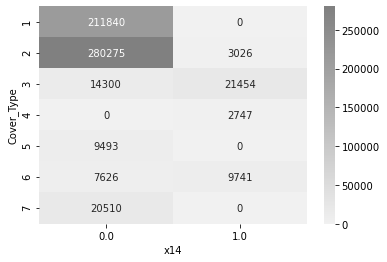

In [21]:
# 히트맵 시각화 
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(df_count, cmap=sn.light_palette("gray", as_cmap=True), annot=True, fmt="0")
plt.show()

In [22]:
# 5. news group 
'''
- 20개의 뉴스 그룹 문서 데이터(문서 분류 모델 예문으로 사용)

•타겟 변수 
◦문서가 속한 뉴스 그룹 : 20개 

•특징 변수 
◦문서 텍스트 : 18,846
'''

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all') # 'train', 'test'
# Downloading 20news dataset.

print(newsgroups.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [23]:
# data vs target
newsgroups.data # text
len(newsgroups.data) # 18846

18846

In [24]:
newsgroups.target # array([10,  3, 17, ...,  3,  1,  7])
len(newsgroups.target) # 18846

18846

In [25]:
# 뉴스 그룹 : 20개 이름 
newsgroups.target_names # ['alt.atheism', ... 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
# 1,2번째 뉴스 보기 
print(newsgroups.data[0],"\n")
print("=" * 50)
idx = newsgroups.target[0]
print(newsgroups.target_names[idx])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!

 

rec.sport.hockey


In [29]:
print(newsgroups.data[1],"\n")
print("=" * 50)
idx = newsgroups.target[1]
print(newsgroups.target_names[idx]) # rec.sport.hockey

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   
 

comp.sys.ibm.pc.hardware


In [30]:
### 텍스트 벡터 변환 ###
'''
 텍스트 데이터로 예측모델 또는 군집 모델을 생성하기 위해서 먼저 텍스트를 
 적절한 숫자 값의 벡터로 만든다. 
'''
# train dataset 4개 뉴스그룹 대상 : 희소행렬  
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',categories=cats)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape # (2034, 34118)

(2034, 34118)

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# NB 모델 생성 
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target) # 훈련셋 적용 

MultinomialNB(alpha=0.01)

In [32]:
# test dataset 4개 뉴스그룹 대상 : 희소행렬
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors_test.shape # (1353, 34118)

(1353, 34118)

In [33]:
# 모델 예측치
pred = clf.predict(vectors_test)

In [34]:
# 모델 평가 : average=[None, 'micro', 'macro', 'weighted'].
metrics.f1_score(newsgroups_test.target, pred, average='micro') 

0.893569844789357

In [35]:
# real value vs predict
newsgroups_test.target[:20]
pred[:20]

array([2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2],
      dtype=int64)